In [64]:
import seaborn as sns
import pandas as pd

In [65]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

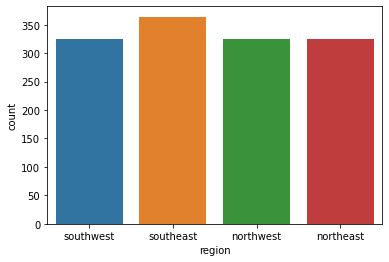

In [68]:
sns.countplot(x=df['region'])

In [69]:
categorical_features = [i for i in df.columns if df[i].dtypes=='O']

In [70]:
categorical_features

['sex', 'smoker', 'region']

In [72]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df[categorical_features] = df[categorical_features].apply(LE.fit_transform)

In [73]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [74]:
X = df.iloc[:,:6]

In [75]:
y = df.iloc[:,-1]

In [78]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [112]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=3)
DTR.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [113]:
y_pred = DTR.predict(x_test)

In [114]:
y_pred[0:2]

array([10406.77138663,  6350.82542396])

In [115]:
from sklearn import metrics
from sklearn.metrics import r2_score
R2 = metrics.r2_score(y_test,y_pred)
print(R2)

0.8530572866320028


In [116]:
score = DTR.score(x_train, y_train)
print("R-squared:", score) 

R-squared: 0.8536698744663597


In [118]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)


pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

##RSME is always greater than or equal to MAE (RSME >= MAE). 
##The greater difference between them indicates greater variance in 
##individual errors in the sample.

<IPython.core.display.Javascript object>

,Metrics
MAE,2.865638e+03
MSE,2.281267e+07
RMSE,4.776261e+03


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

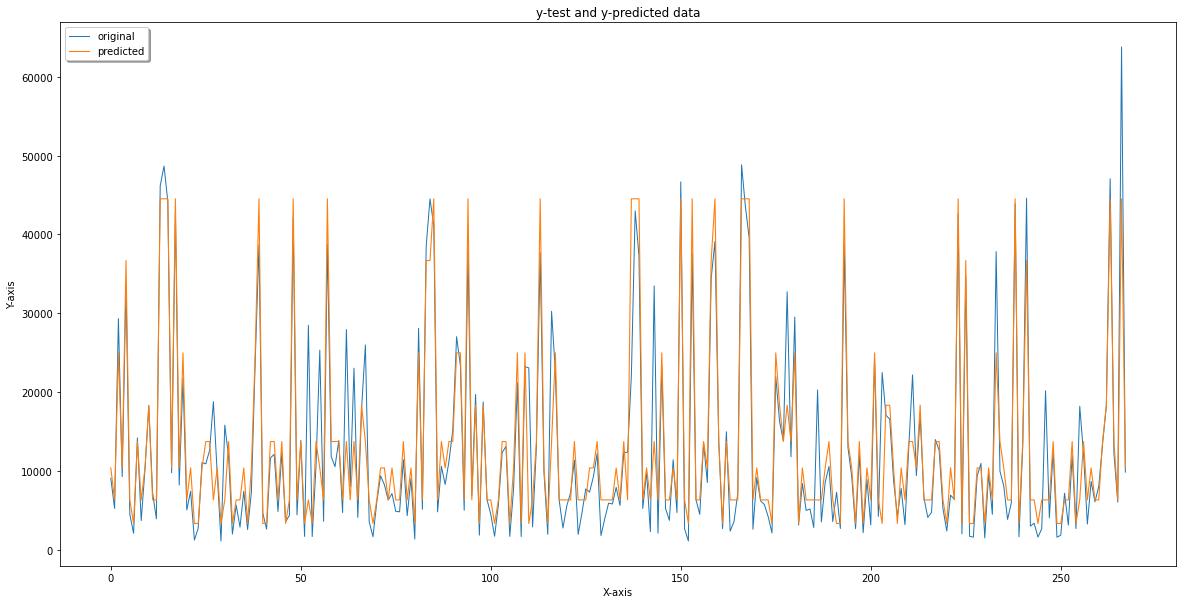

In [124]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
# plt.grid(True)
plt.show() 